# Importando dependências

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import funcs as f

/home/geffte-caetano/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Leitura e pré-processamento de dados 

In [3]:
df_sivep = f.ler_planilha()
df_sivep = f.remover_colunas_vazias(df_sivep)
df_sivep = f.remover_futeis(df_sivep)

# Entendendo os dados

In [3]:
print(df_sivep.keys())

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'CS_SEXO',
       'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ETINIA',
       ...
       'FAB_COVRF2', 'FAB_ADIC', 'FAB_RE_BI', 'LOTE_ADIC', 'TRAT_COV',
       'TIPO_TRAT', 'DT_TRT_COV', 'OUT_TRAT', 'SURTO_SG', 'CO_DETEC'],
      dtype='object', length=143)


In [4]:
lista_frequencia = f.frequencia_valores(df_sivep)

In [5]:
for index, row in enumerate(lista_frequencia):
    for key in enumerate(row):
        if key[0] == 0:
            print(key[1])
        else:
            for i in key[1]:
                print(i)
            print()

CS_SEXO
('M', 1030)
('F', 994)

TP_IDADE
('3', 1484)
('2', 487)
('1', 53)

CS_ETINIA
('nulos', 2022)
('GUARANI KAIOWA (PAI TAVYTERA)', 1)
('TERENA', 1)

NOSOCOMIAL
('2.0', 1840)
('1.0', 143)
('9.0', 30)
('nulos', 11)

FEBRE
('1.0', 1625)
('nulos', 320)
('2.0', 72)
('9.0', 7)

TOSSE
('1.0', 1692)
('nulos', 229)
('2.0', 98)
('9.0', 5)

GARGANTA
('2.0', 891)
('nulos', 890)
('1.0', 237)
('9.0', 6)

DISPNEIA
('1.0', 1382)
('nulos', 368)
('2.0', 272)
('9.0', 2)

DESC_RESP
('1.0', 1588)
('nulos', 368)
('2.0', 64)
('9.0', 4)

SATURACAO
('1.0', 1246)
('nulos', 509)
('2.0', 265)
('9.0', 4)

DIARREIA
('nulos', 915)
('2.0', 891)
('1.0', 214)
('9.0', 4)

VOMITO
('nulos', 904)
('2.0', 876)
('1.0', 240)
('9.0', 4)

OUTRO_SIN
('nulos', 692)
('1.0', 668)
('2.0', 661)
('9.0', 3)

FATOR_RISC
('1', 1064)
('2', 960)

PUERPERA
('nulos', 1528)
('2.0', 488)
('1.0', 8)

CARDIOPATI
('nulos', 1353)
('1.0', 360)
('2.0', 311)

HEMATOLOGI
('nulos', 1514)
('2.0', 481)
('1.0', 29)

SIND_DOWN
('nulos', 1526)
('2.0', 4

In [6]:
with open('frequencia_valores.txt', 'w') as file:
    for index, row in enumerate(lista_frequencia):
        for key in enumerate(row):
            if key[0] == 0:
                file.write(f"{key[1]}\n")
            else:
                for i in key[1]:
                    file.write(f"{i}\n")
                file.write("\n")


# Chamando funções e aplicando filtros

## calcular proporção de pacientes por sexo

In [6]:
df_sexo = f.proporcao_pacientes_por_sexo(df_sivep)
df_sexo.head()

CS_SEXO
M    0.508893
F    0.491107
Name: proportion, dtype: float64

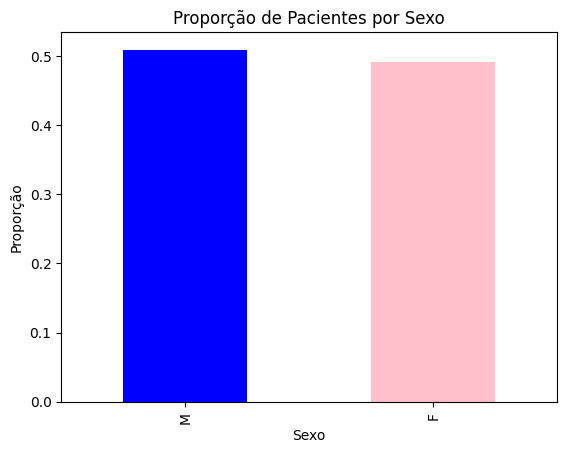

In [7]:
df_sexo.plot(kind='bar', color=['blue', 'pink'])

plt.title('Proporção de Pacientes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Proporção')
plt.show()


## calcular doenças mais frequentes

In [32]:
df_doencas = f.doenca_mais_frequente(df_sivep)
df_doencas.rename(index={1: 'SRAG por Influenza', 2: 'SRAG por outro vírus', 3: 'SRAG por outro agente Etiológico', 4: 'SRAG não especificado', 5: 'COVID-19'}, inplace=True)
df_doencas.head()

CLASSI_FIN
SRAG não especificado               0.419273
SRAG por outro vírus                0.341574
SRAG por Influenza                  0.128153
COVID-19                            0.107972
SRAG por outro agente Etiológico    0.003027
Name: proportion, dtype: float64

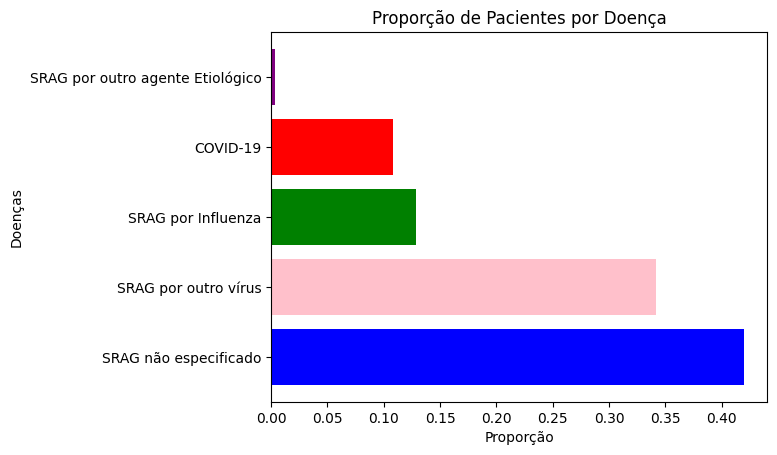

In [49]:
# df_doencas.plot(kind='bar', color=['blue', 'pink', 'green', 'red', 'purple'])

plt.barh(df_doencas.index, df_doencas.values, color=['blue', 'pink', 'green', 'red', 'purple'])

plt.title('Proporção de Pacientes por Doença')
plt.xlabel('Proporção')
plt.ylabel('Doenças')
plt.show()

## calcular sintomas mais frequentes

In [4]:
df_sintomas = f.sintomas_mais_frequente(df_sivep)
df_sintomas.head(11)

/home/geffte-caetano/Documents/GitHub/ecos-da-rota/funcs.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contagem = df_sintomas.applymap(lambda x: 1 if (x == 1 or x == 2 or x == 9) else 0).sum()


,sintoma,frequencia
0,DESC_RESP,1656
1,DIARREIA,1109
2,AVE_SUINO,2004
3,NOSOCOMIAL,2013
4,SATURACAO,1515
5,VOMITO,1120
6,GARGANTA,1134
7,DISPNEIA,1656
8,TOSSE,1795
9,OUTRO_SIN,1332


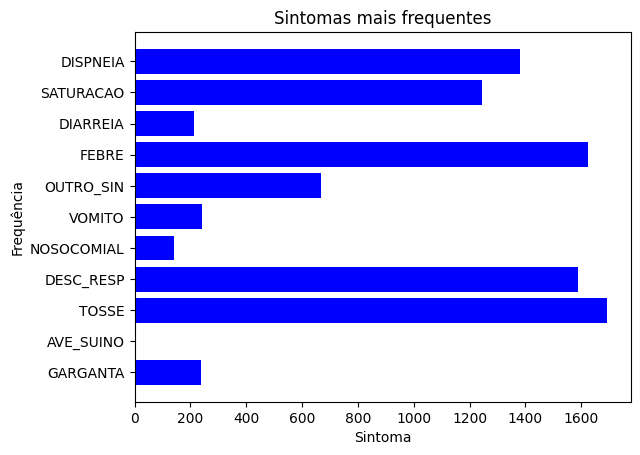

In [46]:
# df_sintomas.plot(kind='bar', x='sintoma', y='frequencia', color='blue')

plt.barh(df_sintomas['sintoma'], df_sintomas['frequencia'], color='blue')

plt.title('Sintomas mais frequentes')
plt.xlabel('Sintoma')
plt.ylabel('Frequência')
plt.show()

## calcular pacientes com fator de risco 

In [37]:
df_risco = f.fator_risco(df_sivep)
df_risco.rename(index={1: 'Sim', 2: 'Não'}, inplace=True)
df_risco.head()

FATOR_RISC
Sim    0.525692
Não    0.474308
Name: proportion, dtype: float64

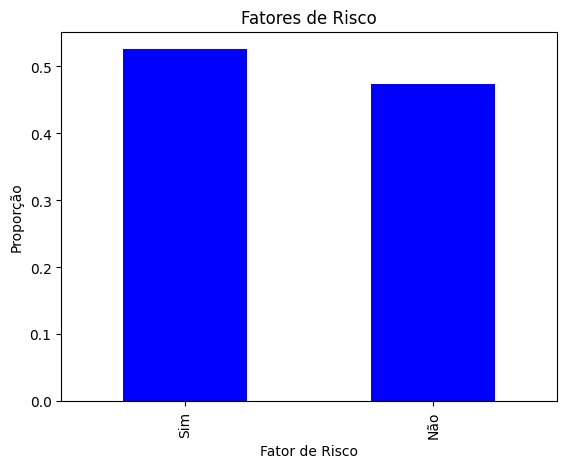

In [38]:
df_risco.plot(kind='bar', color='blue')

plt.title('Fatores de Risco')
plt.xlabel('Fator de Risco')
plt.ylabel('Proporção')
plt.show()

## proporção por fatores de risco

In [60]:
df_fatores = fatores_risco(df_sivep)
df_fatores.head(11)

/tmp/ipykernel_4287/1743814773.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contagem = df_fatores.applymap(lambda x: 1 if x == 1 else 0).sum()


,fator,frequencia
0,PUERPERA,8
1,ASMA,91
2,RENAL,62
3,DIABETES,181
4,PNEUMOPATI,85
5,IMUNODEPRE,94
6,OBESIDADE,46
7,CARDIOPATI,360
8,HEPATICA,11
9,NEUROLOGIC,124


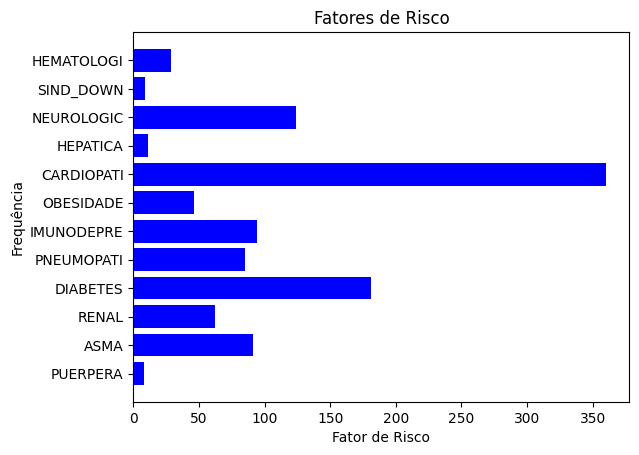

In [61]:
plt.barh(df_fatores['fator'], df_fatores['frequencia'], color='blue')

plt.title('Fatores de Risco')
plt.xlabel('Fator de Risco')
plt.ylabel('Frequência')
plt.show()

## calcular media de idade dos pacientes

In [39]:
df_idades, media_idades, dp_idades = f.media_idade_pacientes(df_sivep)

valores_x = np.linspace(df_idades['NU_IDADE_N'].min(), df_idades['NU_IDADE_N'].max(), 100)
valores_y = norm.pdf(valores_x, media_idades, dp_idades)

In [42]:
print(f'Média de idades: {media_idades}')
print(f'Desvio padrão de idades: {dp_idades}')

Média de idades: 29.400691699604742
Desvio padrão de idades: 31.05436719233022


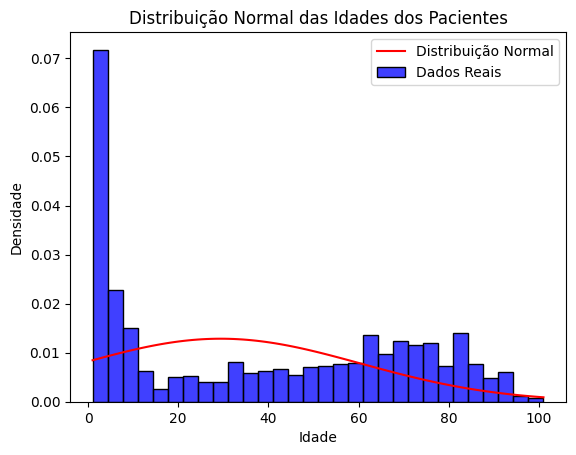

In [41]:
sns.histplot(df_idades['NU_IDADE_N'], kde=False, color='blue', stat='density', bins=30, label='Dados Reais')

plt.plot(valores_x, valores_y, color='red', label='Distribuição Normal')

plt.title('Distribuição Normal das Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()

plt.show()

## calcular vacinas tomadas

In [57]:
df_vacina = f.tomou_vacina(df_sivep)
df_vacina.head()

,tomou,nao_tomou,ignorado,null
0,12,275,580,1157


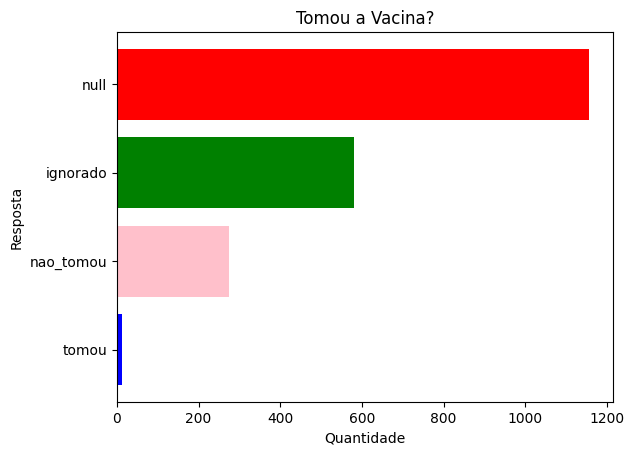

In [58]:
plt.barh(df_vacina.columns, df_vacina.values[0], color=['blue', 'pink', 'green', 'red'])

plt.title('Tomou a Vacina?')
plt.xlabel('Quantidade')
plt.ylabel('Resposta')
plt.show()